# Forschungsdaten des Georg-Eckert-Instituts (worldviews)



<a id="0"></a>
## Inhalt

1. [Statistische Beschreibung des Datensatzes](#1)

2. [Univariate Plots](#2)

   [Publikation von Forschungsdaten im Zeitverlauf](#2.1)

   [Entstehungszeit der Ressourcen](#2.4)
   
   [Verteilung der Urheberschaft](#2.2)

   [Sprachverteilung](#2.3)

   [Verteilung der Publisher](#2.5)

   [Verteilung des Ressourcentyps](#2.6)
   
   [Verteilung des Ressourcenformats](#2.7)

3. [Word Clouds](#3)

   3.1 [Häufige Titelbegriffe](#3.1)

   3.2 [Beschreibung der Ressource](#3.2)

   3.3 [Thema der Ressource](#3.3)

4. [Bi- und multivariate Plots](#4)

<a id="1"></a>
## 1 Statistische Beschreibung des Datensatzes

[Zurück zum Anfang](#0)

In [38]:
# Importieren der Bibliotheken
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [39]:

# Erstellen des 1. Dataframes (zeilenweise)
data_worldviews = pd.read_csv(r'../../data/refined/clarin/worldviews/worldviews-records-20240620_refined.csv',
dtype=str,  # Set all columns to be strings
low_memory=False)  # Optional, suppresses the DtypeWarning)


# Erstellen des 2. Dataframes (recordweise gruppiert)
# Kopie des Dataframes erstellen, record identifier durch alle Zeilen füllen

data_worldviews_grouped = data_worldviews.copy()
data_worldviews_grouped['record id'] = data_worldviews_grouped['record id'].ffill()  # record id auffüllen


# Gruppieren und joinen der Daten nach record id
data_worldviews_grouped = data_worldviews_grouped.groupby('record id').agg({
    'datestamp': 'first',  
    'type': lambda x: '; '.join(x.dropna().unique()),  
    'type - dcmi recommendation': lambda x: '; '.join(x.dropna().unique()),
    'format': lambda x: '; '.join(x.dropna().unique()),  
    'format - mediatype': lambda x: '; '.join(x.dropna().unique()),  
    'format - subtype': lambda x: '; '.join(x.dropna().unique()),  
    'subject': lambda x: '; '.join(x.dropna().unique()), 
    'title': lambda x: '; '.join(x.dropna().unique()),
    'date': lambda x: '; '.join(x.dropna().unique()), 
    'identifier': lambda x: '; '.join(x.dropna().unique()), 
    'source': lambda x: '; '.join(x.dropna().unique()),
    'rights': lambda x: '; '.join(x.dropna().unique()),
    'record id': 'first',  # Just use the first value for 'record id'  
}).reset_index(drop=True)

data_worldviews_grouped.fillna('NA', inplace=True)  # NaT durch NA ersetzen

data_worldviews_grouped[['date', 'datestamp']] = data_worldviews_grouped[['date', 'datestamp']].apply(pd.to_datetime, errors='coerce')
data_worldviews[['date', 'datestamp']] = data_worldviews[['date', 'datestamp']].apply(pd.to_datetime, errors='coerce')

data_worldviews_grouped.replace('','NA', inplace=True)  # Fehlende Werte mit NA ersetzen


C:\Users\miema\AppData\Local\Temp\ipykernel_9664\4279941153.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_worldviews_grouped[['date', 'datestamp']] = data_worldviews_grouped[['date', 'datestamp']].apply(pd.to_datetime, errors='coerce')


                        column count   type
8                         date   294  valid
0                    datestamp   327  valid
3                       format   327  valid
4           format - mediatype   327  valid
5             format - subtype   327  valid
9                   identifier   327  valid
12                   record id   327  valid
11                      rights   327  valid
10                      source   327  valid
6                      subject   327  valid
7                        title   327  valid
1                         type   327  valid
2   type - dcmi recommendation   327  valid


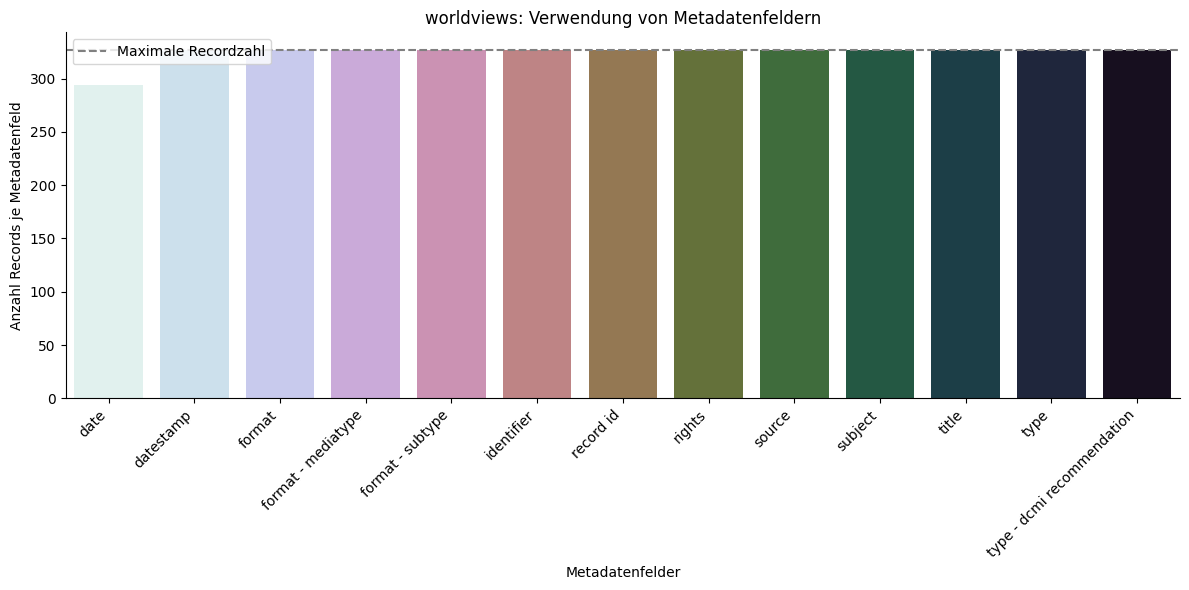

In [41]:
# Erstellen eines DataFrames zur Zusammenfassung der gültigen Einträge für jedes Metadatenfeld
metadata_usage = pd.DataFrame(columns=['column', 'count', 'type'])

# Verwendung des gruppierten Dataframes
for column in data_worldviews_grouped.columns:
    # Zählen gültiger Werte
    valid_count = data_worldviews_grouped[column][data_worldviews_grouped[column] != 'NA'].count()

    # Erstellen eines temporären DataFrames
    valid_row = pd.DataFrame({'column': [column], 'count': [valid_count], 'type': ['valid']})

    # Verkettung der Zeilen
    metadata_usage = pd.concat([metadata_usage, valid_row], ignore_index=True)

metadata_usage = metadata_usage.sort_values(by='column')

# Ausgabe zur Prüfung von metadata_usage
print(metadata_usage)

# Berechnen der maximalen Anzahl der Records mit 'record id'
max_record_count = data_worldviews_grouped['record id'].nunique()


sns.catplot(data=metadata_usage, x='column', y='count', kind='bar', height=6, aspect=2, hue='column', palette='cubehelix_r')

# Zeichnen einer horizontalen Linie bei der maximalen Datensatzanzahl
plt.axhline(y=max_record_count, color='grey', linestyle='--', label='Maximale Recordzahl')

# Plot-Beschriftungen und Titel anpassen
plt.xticks(rotation=45, ha='right')
plt.xlabel('Metadatenfelder')
plt.ylabel('Anzahl Records je Metadatenfeld')
plt.title('worldviews: Verwendung von Metadatenfeldern')
plt.legend()
plt.tight_layout()
plt.savefig("worldviews_Verwendung_von_Metadatenfeldern.png", dpi=600, bbox_inches='tight')
plt.show()


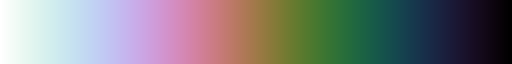

In [42]:
sns.color_palette("cubehelix_r", as_cmap=True)

In [5]:
'Zeilenweiser Dataframe: Info zu Spalten und Datentypen'

data_worldviews.info() # Spaltennamen, Datentypen und fehlende Werte anzeigen

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   datestamp                   327 non-null    object
 1   type                        654 non-null    object
 2   type - dcmi recommendation  327 non-null    object
 3   format                      654 non-null    object
 4   format - mediatype          654 non-null    object
 5   format - subtype            654 non-null    object
 6   subject                     589 non-null    object
 7   title                       327 non-null    object
 8   date                        360 non-null    object
 9   identifier                  327 non-null    object
 10  source                      327 non-null    object
 11  rights                      327 non-null    object
 12  record - header - setSpec   589 non-null    object
 13  record id                   327 non-null    object

In [45]:
'Zeilenweiser Dataframe: Erste 5 Zeilen'

data_worldviews.head() 

,datestamp,type,type - dcmi recommendation,format,format - mediatype,format - subtype,subject,title,date,identifier,source,rights,record - header - setSpec,record id
0,2018-09-14 14:17:27+00:00,Source,Text,image/jpeg,image,jpeg,WorldViews,Soll die Türkei in die EU? (2013),2013-01-01 00:00:00+00:00,http://worldviews.gei.de/piresolver?id=DE_2013...,"-: ""Soll die Türkei in die EU?"" (2013), Kreisf...",Open Access,WorldViews,DE_2013_Riedel_PolitikUndCo_241__248_ger
1,NaT,Text,NaN,application/pdf,application,pdf,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
2,2018-09-14 14:17:27+00:00,Source,Text,image/jpeg,image,jpeg,WorldViews,Soll die Türkei in die EU? (2013),2013-01-01 00:00:00+00:00,http://worldviews.gei.de/piresolver?id=DE_2013...,"-: ""Soll die Türkei in die EU?"" (2013), Kreisf...",Open Access,WorldViews,DE_2013_Riedel_PolitikUndCo_241__248_eng
3,NaT,Text,NaN,application/pdf,application,pdf,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
4,2018-09-14 15:42:02+00:00,Source,Text,image/jpeg,image,jpeg,WorldViews,The Portuguese take possession of the land of ...,1976-01-01 00:00:00+00:00,http://worldviews.gei.de/piresolver?id=BR_1976...,"-: ""The Portuguese take possession of the land...",Open Access,WorldViews,BR_1976_Abramo_EnsinoCriativoDeHistoriaDoBrasi...


In [46]:
'Zeilenweiser Dataframe: Statistische Kennzahlen'

data_worldviews.describe() 

,datestamp,type,type - dcmi recommendation,format,format - mediatype,format - subtype,subject,title,date,identifier,source,rights,record - header - setSpec,record id
count,327,654,327,654,654,654,589,327,360,327,327,327,589,327
unique,NaN,4,1,2,2,2,2,149,NaN,153,153,1,2,327
top,NaN,Text,Text,image/jpeg,image,jpeg,WorldViews,Europäische Expansion in der Frühen Neuzeit,NaN,http://worldviews.gei.de/piresolver?id=UR_1997...,"-: ""Legacy of Mediterranean cultures"", Montevi...",Open Access,WorldViews,DE_2013_Riedel_PolitikUndCo_241__248_ger
freq,NaN,327,327,327,327,327,326,4,NaN,3,3,327,326,1
mean,2018-09-03 06:43:48.626911488+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1978-05-04 17:04:00+00:00,NaN,NaN,NaN,NaN,NaN
min,2018-07-17 07:22:58+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1882-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
25%,2018-08-14 15:00:30+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1961-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
50%,2018-09-04 11:22:11+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
75%,2018-09-14 15:50:36+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-04-02 06:00:00+00:00,NaN,NaN,NaN,NaN,NaN
max,2019-01-24 16:28:53+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN


In [47]:
'Recordweiser Dataframe: Info zu Spalten und Datentypen'

data_worldviews_grouped.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   datestamp                   327 non-null    datetime64[ns, UTC]
 1   type                        327 non-null    object             
 2   type - dcmi recommendation  327 non-null    object             
 3   format                      327 non-null    object             
 4   format - mediatype          327 non-null    object             
 5   format - subtype            327 non-null    object             
 6   subject                     327 non-null    object             
 7   title                       327 non-null    object             
 8   date                        294 non-null    datetime64[ns, UTC]
 9   identifier                  327 non-null    object             
 10  source                      327 non-null    object            

In [48]:
'recordweiser Dataframe: Erste 5 Zeilen'

data_worldviews_grouped.head(200) 

,datestamp,type,type - dcmi recommendation,format,format - mediatype,format - subtype,subject,title,date,identifier,source,rights,record id
0,2018-12-05 13:26:54+00:00,Source; Text,Text,image/jpeg; application/pdf,image; application,jpeg; pdf,WorldViews; EurViews,Afrika im Krieg,NaT,http://worldviews.gei.de/piresolver?id=AFR_199...,"-: Afrika im Krieg, Paris: - 2010 (1995).",Open Access,AFR_1995_NN_SecondeMoitieDuXIXeXXeSiecle_66_67...
1,2018-12-05 13:26:54+00:00,Source; Text,Text,image/jpeg; application/pdf,image; application,jpeg; pdf,WorldViews; EurViews,Afrika im Krieg,NaT,http://worldviews.gei.de/piresolver?id=AFR_199...,"-: Afrika im Krieg, Paris: - 2010 (1995).",Open Access,AFR_1995_NN_SecondeMoitieDuXIXeXXeSiecle_66_67...
2,2018-12-05 13:26:54+00:00,Source; Text,Text,image/jpeg; application/pdf,image; application,jpeg; pdf,WorldViews; EurViews,Afrika im Krieg,NaT,http://worldviews.gei.de/piresolver?id=AFR_199...,"-: Afrika im Krieg, Paris: - 2010 (1995).",Open Access,AFR_1995_NN_SecondeMoitieDuXIXeXXeSiecle_66_67...
3,2018-09-14 14:59:01+00:00,Source; Text,Text,image/jpeg; application/pdf,image; application,jpeg; pdf,WorldViews; EurViews,End of the colony of Sancti Spiritus,1884-01-01 00:00:00+00:00,http://worldviews.gei.de/piresolver?id=AR_1884...,"-: ""End of the colony of Sancti Spiritus"", Bue...",Open Access,AR_1884_Cambon_BrevesLeccionesDeHistoriaArgent...
4,2018-09-14 14:59:01+00:00,Source; Text,Text,image/jpeg; application/pdf,image; application,jpeg; pdf,WorldViews; EurViews,End of the colony of Sancti Spiritus,1884-01-01 00:00:00+00:00,http://worldviews.gei.de/piresolver?id=AR_1884...,"-: ""End of the colony of Sancti Spiritus"", Bue...",Open Access,AR_1884_Cambon_BrevesLeccionesDeHistoriaArgent...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2018-07-17 07:24:39+00:00,Source; Text,Text,image/jpeg; application/pdf,image; application,jpeg; pdf,WorldViews; EurViews,Die Welt von 1848 und 1948,1948-01-01 00:00:00+00:00,http://worldviews.gei.de/piresolver?id=FR_1948...,"-: Die Welt von 1848 und 1948, Paris: - 1948.",Open Access,FR_1948_MorazeWolff_NouveauCourseDHistoire_3_5...
196,2018-07-17 07:24:39+00:00,Source; Text,Text,image/jpeg; application/pdf,image; application,jpeg; pdf,WorldViews; EurViews,Die Welt von 1848 und 1948,1948-01-01 00:00:00+00:00,http://worldviews.gei.de/piresolver?id=FR_1948...,"-: Die Welt von 1848 und 1948, Paris: - 1948.",Open Access,FR_1948_MorazeWolff_NouveauCourseDHistoire_3_5...
197,2018-08-14 15:00:30+00:00,Source; Text,Text,image/jpeg; application/pdf,image; application,jpeg; pdf,WorldViews; EurViews,The European Expansion,1987-01-01 00:00:00+00:00,http://worldviews.gei.de/piresolver?id=FR_1987...,"-: ""The European Expansion"", Paris: - 1987.",Open Access,FR_1987_BorneEtal_HistoireSeconde_320_321_eng
198,2018-08-14 15:00:30+00:00,Source; Text,Text,image/jpeg; application/pdf,image; application,jpeg; pdf,WorldViews; EurViews,The European Expansion,1987-01-01 00:00:00+00:00,http://worldviews.gei.de/piresolver?id=FR_1987...,"-: ""The European Expansion"", Paris: - 1987.",Open Access,FR_1987_BorneEtal_HistoireSeconde_320_321_fre


In [49]:
'Recordweiser Dataframe: Statistische Kennzahlen'
data_worldviews_grouped.describe()

,datestamp,type,type - dcmi recommendation,format,format - mediatype,format - subtype,subject,title,date,identifier,source,rights,record id
count,327,327,327,327,327,327,327,327,294,327,327,327,327
unique,NaN,3,1,1,1,1,3,149,NaN,153,153,1,327
top,NaN,Source; Text,Text,image/jpeg; application/pdf,image; application,jpeg; pdf,WorldViews; EurViews,Nationale Identität und Europäische Identität,NaN,http://worldviews.gei.de/piresolver?id=AFR_199...,"-: Afrika im Krieg, Paris: - 2010 (1995).",Open Access,AFR_1995_NN_SecondeMoitieDuXIXeXXeSiecle_66_67...
freq,NaN,263,327,327,327,327,262,4,NaN,3,3,327,1
mean,2018-09-03 06:43:48.626911232+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1978-09-12 15:06:07.346938784+00:00,NaN,NaN,NaN,NaN
min,2018-07-17 07:22:58+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN
25%,2018-08-14 15:00:30+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1953-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN
50%,2018-09-04 11:22:11+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN
75%,2018-09-14 15:50:36+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN
max,2019-01-24 16:28:53+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN


<a id="2"></a>
## 2 Univariate Plots

[Zurück zum Anfang](#0)


***Untersuchte Variablen:***

- datestamp 
- date
- language
- publisher
- type
- format

<a id="2.1"></a>
### 2.1 Publikation von Forschungsdaten im Zeitverlauf
[Zurück zum Anfang](#0)

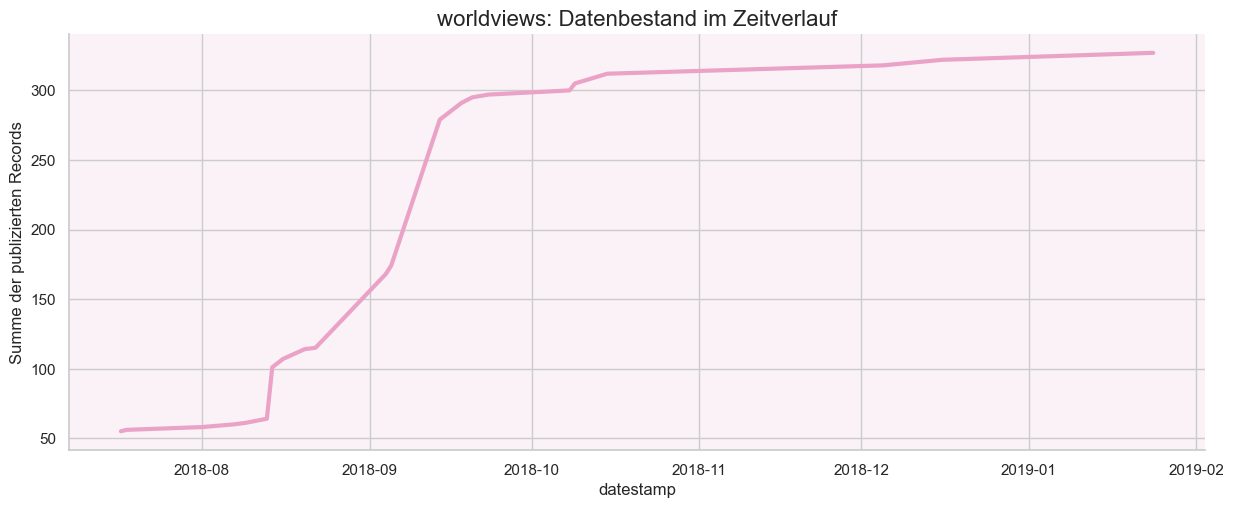

frühster Datestamp: 2018-07-17 ; spätester Datestamp: 2019-01-24


In [83]:
daily_counts = data_worldviews.groupby(data_worldviews['datestamp'].dt.date).size().reset_index(name='count')# Gruppieren und Zählen der Records nach Datum
daily_counts['cumulative_count'] = daily_counts['count'].cumsum() # Berechnen der kumulativen Summe


sns.set_style('whitegrid', {'axes.facecolor':'#faf2f6', 'figure.facecolor': 'white' }) # Style des Plots anpassen

# Plot der kumulativen Summe der Records über die Zeit
sns.relplot(daily_counts, x='datestamp', y='cumulative_count', kind='line', aspect=2.5, errorbar = None, color='#eba2c7', linewidth=3)


plt.title('worldviews: Datenbestand im Zeitverlauf', fontsize=16)
plt.xlabel('datestamp', fontsize=12)
plt.ylabel('Summe der publizierten Records', fontsize=12)
plt.savefig("worldviews_datestamp_line_cum.png", dpi=600, bbox_inches='tight')
# plt.xticks(rotation=45) 
plt.show()

print('frühster Datestamp:', data_worldviews['datestamp'].min().date(), '; spätester Datestamp:', data_worldviews['datestamp'].max().date())

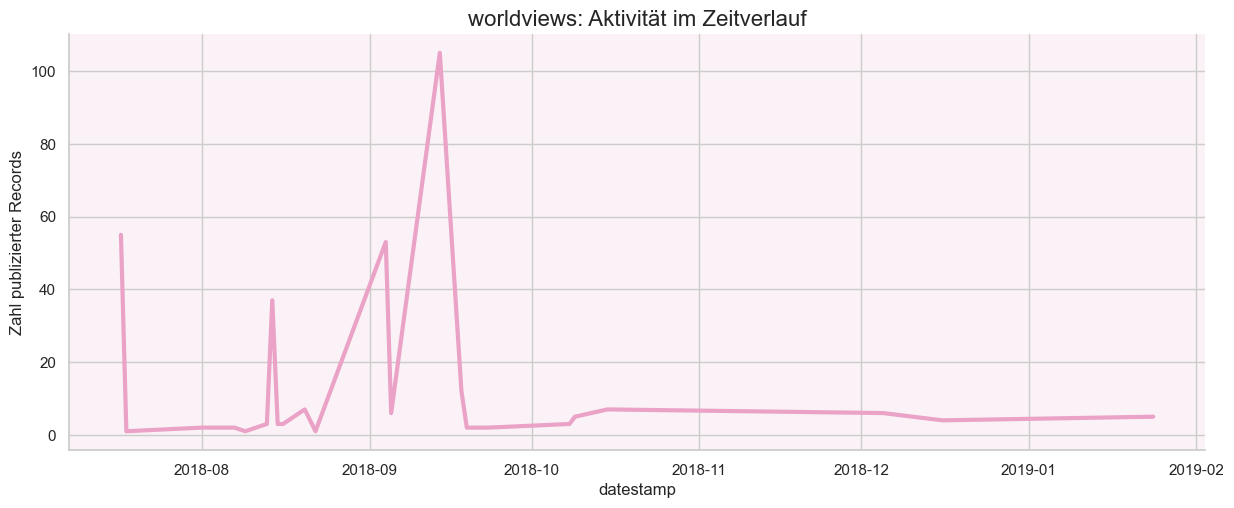

frühster Datestamp: 2018-07-17 ; spätester Datestamp: 2019-01-24


In [84]:

# verwendet daily_counts = gruppierte Records nach datestamp

sns.set_style('whitegrid', {'axes.facecolor':'#faf2f6', 'figure.facecolor': 'white' }) # Style des Plots anpassen

sns.relplot(data=daily_counts, x='datestamp', y='count', kind='line', color='#eba2c7', aspect=2.5, linewidth=3) 

plt.title('worldviews: Aktivität im Zeitverlauf', fontsize=16)
plt.xlabel('datestamp', fontsize=12)
plt.ylabel('Zahl publizierter Records', fontsize=12)
plt.savefig("worldviews_datestamp_line.png", dpi=600, bbox_inches='tight')
plt.show()

print('frühster Datestamp:', data_worldviews['datestamp'].min().date(), '; spätester Datestamp:', data_worldviews['datestamp'].max().date())

### Entstehungszeit der Ressourcen

[Zurück zum Anfang](#0)

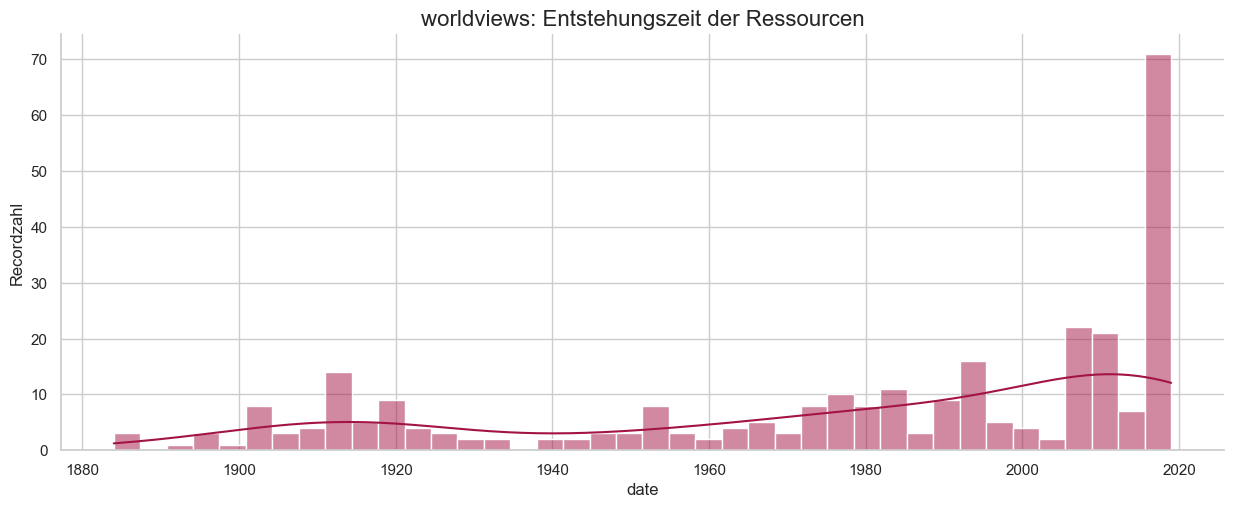

frühstes Datum: 1882-01-01 ; spätestes Datum: 2019-01-01


In [86]:
sns.set_theme(style='whitegrid') # seaborn-Design setzen
sns.displot(data_worldviews_grouped, x='date', bins=40, kde=-True, color = '#a31443', aspect=2.5) # Erscheinungszeitpunkt der Forschungsdaten in absolten Zahlen

plt.title('worldviews: Entstehungszeit der Ressourcen', fontsize=16)
plt.xlabel('date', fontsize=12)
plt.ylabel('Recordzahl', fontsize=12)
plt.savefig("worldviews_date_hist.png", dpi=600, bbox_inches='tight')
plt.show()

print('frühstes Datum:', data_worldviews['date'].min().date(), '; spätestes Datum:', data_worldviews['date'].max().date())

<a id="2.2"></a>
### Verteilung der Urheberschaft
- Metadatenfeld 'creator' ist nicht vergeben

[Zurück zum Anfang](#0)

<a id="2.3"></a>
### Sprachverteilung der Forschungsdaten
- Metadatenfeld 'language' ist nicht vergeben

[Zurück zum Anfang](#0)

<a id="2.5"></a>
### 2.5 Verteilung der Publisher
- Metadatenfeld 'publisher' ist nicht vergeben

[Zurück zum Anfang](#0)

<a id="2.6"></a>
### 2.6 Verteilung des Ressourchentyps

[Zurück zum Anfang](#0)

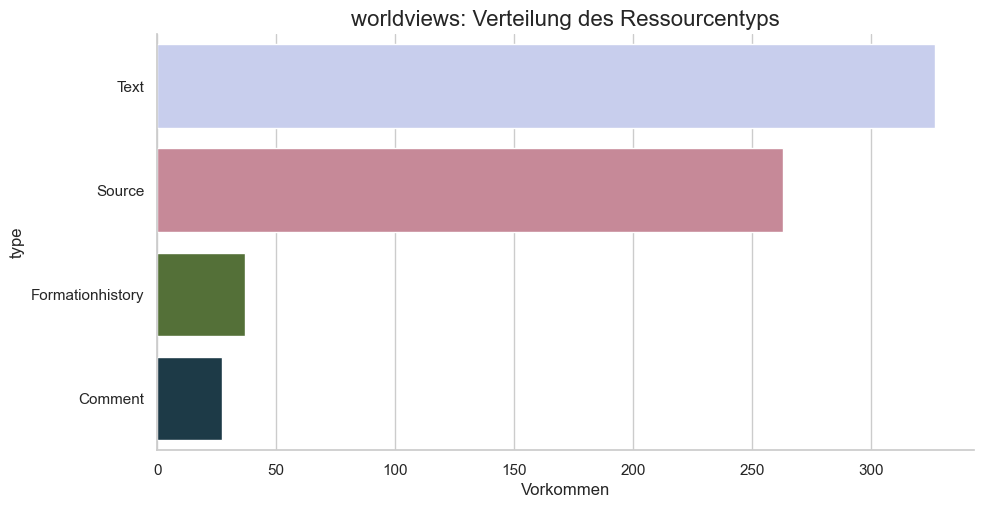

In [96]:

'Verteilung des Ressourcentyps wie vom worldviews angegeben, entspricht ausschließlich Textdaten'

order = data_worldviews['type'].value_counts().index
# Convert the column to a categorical type with the calculated order
data_worldviews['type'] = pd.Categorical(data_worldviews['type'], categories=order, ordered=True)

sns.set_theme(style='whitegrid') 
sns.catplot(data_worldviews, y = 'type', kind = 'count', aspect = 2, hue = 'type', palette='cubehelix_r')

plt.title('worldviews: Verteilung des Ressourcentyps', fontsize=16)
plt.xlabel('Vorkommen', fontsize=12)
plt.ylabel('type', fontsize=12)
plt.savefig("worldviews_type_bar.png", dpi=600, bbox_inches='tight')
plt.show()



<a id="2.7"></a>
### Verteilung des Ressourcenformats

[Zurück zum Anfang](#0)



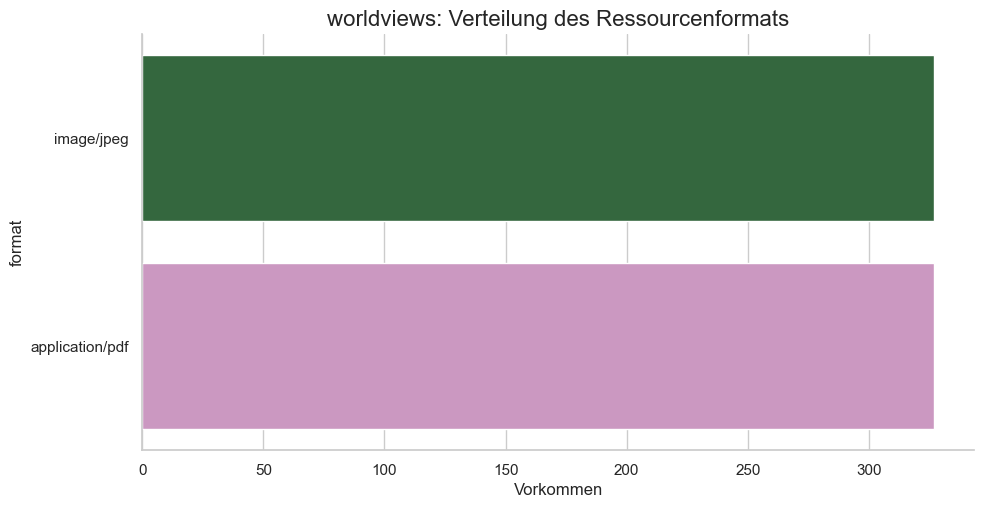

In [98]:
order = data_worldviews['format'].value_counts().index
# Convert the column to a categorical type with the calculated order
data_worldviews['format'] = pd.Categorical(data_worldviews['format'], categories=order, ordered=True)

sns.catplot(data_worldviews, y = 'format', kind = 'count', aspect = 2, hue = 'format', palette='cubehelix')

plt.title('worldviews: Verteilung des Ressourcenformats', fontsize=16)
plt.xlabel('Vorkommen', fontsize=12)
plt.ylabel('format', fontsize=12)
plt.savefig("worldviews_format_bar.png", dpi=600, bbox_inches='tight')
plt.show()

## Thema der Ressource

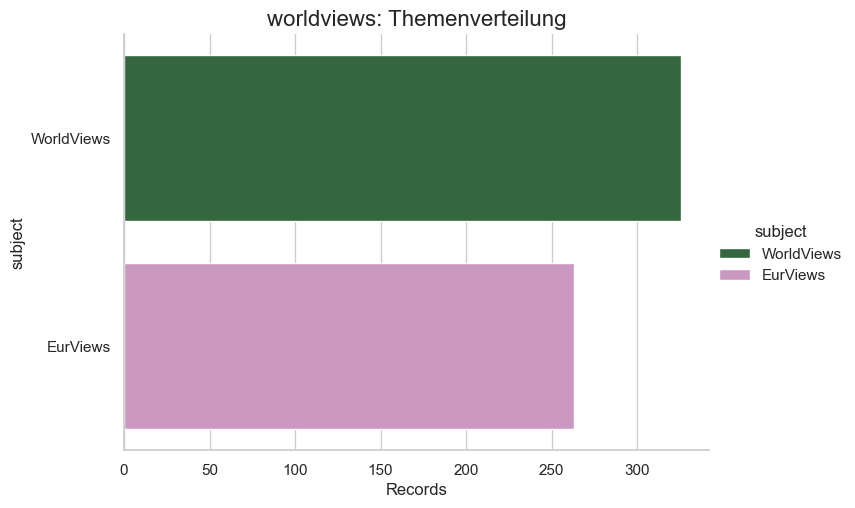

In [91]:
order = data_worldviews['subject'].value_counts().index
# Convert the column to a categorical type with the calculated order
data_worldviews['subject'] = pd.Categorical(data_worldviews['subject'], categories=order, ordered=True)

sns.catplot(data_worldviews, y = 'subject', kind = 'count', aspect = 1.5, hue = 'subject', palette='cubehelix')

plt.title('worldviews: Themenverteilung', fontsize=16)
plt.xlabel('Records', fontsize=12)
plt.ylabel('subject', fontsize=12)
plt.savefig("worldviews_subject_catplot.png", dpi=600, bbox_inches='tight')
plt.show()

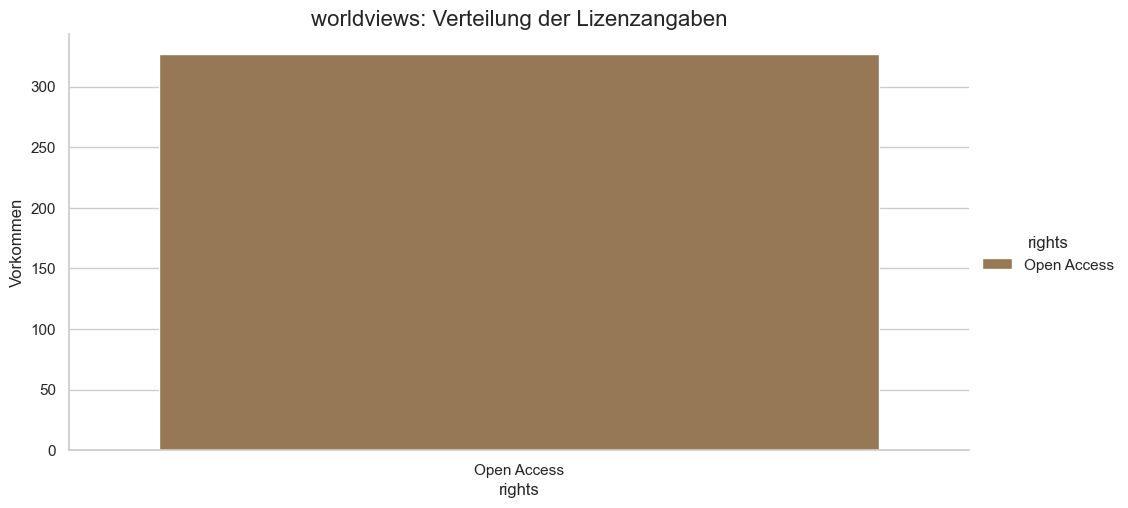

In [101]:
order = data_worldviews['rights'].value_counts().index
# Convert the column to a categorical type with the calculated order
data_worldviews['rights'] = pd.Categorical(data_worldviews['rights'], categories=order, ordered=True)

sns.catplot(data_worldviews, x = 'rights', kind = 'count', aspect = 2, hue = 'rights', palette='cubehelix')

plt.title('worldviews: Verteilung der Lizenzangaben', fontsize=16)
plt.xlabel('rights', fontsize=12)
plt.ylabel('Vorkommen', fontsize=12)

plt.savefig("worldviews_rights_cat.png", dpi=600, bbox_inches='tight')
plt.show()

<a id="3"></a>
## 3 Word Clouds
[Zurück zum Anfang](#0)

- title
- description
- subject

<a id="3.1"></a>
### Häufige Titelbegriffe

[Zurück zum Anfang](#0)

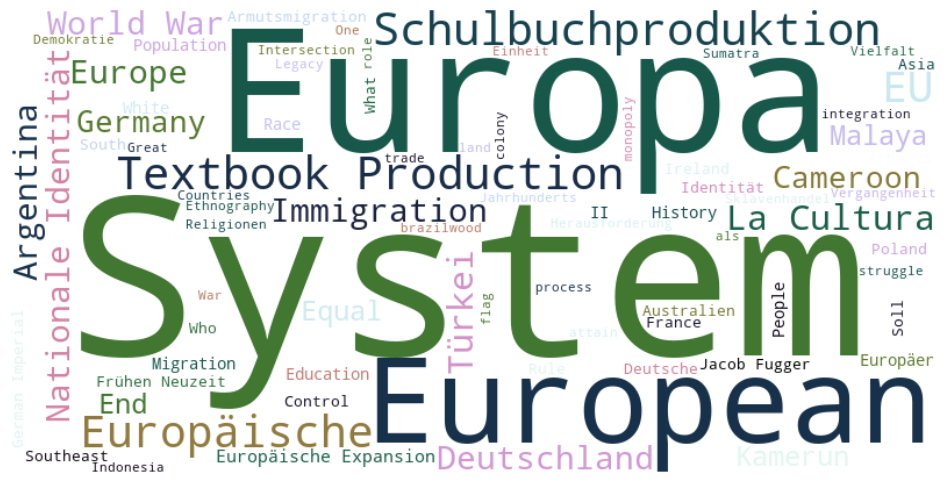

{'System': 1.0, 'Europa': 0.5555555555555556, 'European': 0.4722222222222222, 'Schulbuchproduktion': 0.4444444444444444, 'Textbook Production': 0.4444444444444444, 'Europäische': 0.4166666666666667, 'EU': 0.3888888888888889, 'Türkei': 0.25, 'La Cultura': 0.25, 'Europe': 0.2222222222222222, 'Argentina': 0.2222222222222222, 'Immigration': 0.2222222222222222, 'Deutschland': 0.2222222222222222, 'World War': 0.2222222222222222, 'Nationale Identität': 0.2222222222222222, 'Cameroon': 0.19444444444444445, 'Germany': 0.19444444444444445, 'End': 0.16666666666666666, 'Kamerun': 0.16666666666666666, 'Malaya': 0.16666666666666666, 'Equal': 0.16666666666666666, 'Europäische Expansion': 0.16666666666666666, 'Population': 0.1388888888888889, 'People': 0.1388888888888889, 'White': 0.1388888888888889, 'Race': 0.1388888888888889, 'Migration': 0.1388888888888889, 'II': 0.1388888888888889, 'Europäer': 0.1388888888888889, 'History': 0.1388888888888889, 'Education': 0.1388888888888889, 'Soll': 0.111111111111

In [94]:
# Textdaten für die Word Cloud aus Dataframe wählen
text_data = data_worldviews["title"].str.cat(sep=' ')

stopwords = set([
    'der', 'die', 'das', 'wer', 'wie', 'was', 'wieso', 'weshalb', 'warum', 'den', 'dem', 'des', 'ein', 'eine', 'einer', 'einen', 'einem', 
    'oder', 'und', 'auch', 'auf', 'von', 'zu', 'zur', 'in', 'im', 'aus', 'vor', 'nach', 'bzw', 'bis', 'mit', 'ohne', 'um', 'durch', 'für',
    'and', 'about', 'the', 'this', 'that', 'to', 'be', 'by', 'on', 'of', 'an', 'a', 'for', 'from'])

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='cubehelix_r', stopwords = stopwords, max_words=80).generate(text_data)


#Plotten mit matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.savefig("worldviews_wordcloud.png", dpi=600, bbox_inches='tight')
plt.show()

print(wordcloud.words_)



<a id="3.2"></a>
### Beschreibung der Resource
- Metadatenfeld 'description' nicht vergeben

[Zurück zum Anfang](#0)